# Exploratory Data Analysis on a Natural Language Processing Task
> Authors: Caroline Schmitt, Matt Brems

---

Exploratory data analysis (EDA) is a crucial part of any data science project. EDA helps us discover interesting relationships in the data, detect outliers and errors, examine our own assumptions about the data, and prepare for modeling. During EDA we might discover that we need to clean our data more conscientiously, or that we have more missing data than we realized, or that there aren't many patterns in the data (indicating that modeling may be challenging.)

In this lab you'll bring in a natural language dataset and perform EDA. The dataset contains Facebook statuses taken from between 2009 and 2011 as well as personality test results associated with the users whose Facebook statuses are included.

This dataset uses results from the Big Five Personality Test, also referred to as the five-factor model, which measures a person's score on five dimensions of personality:
- **O**penness
- **C**onscientiousness
- **E**xtroversion
- **A**greeableness
- **N**euroticism

Notoriously, the political consulting group Cambridge Analytica claims to have predicted the personalities of Facebook users by using those users' data, with the goal of targeting them with political ads that would be particularly persuasive given their personality type. Cambridge Analytica claims to have considered 32 unique 'groups' in the following fashion:
- For each of the five OCEAN qualities, a user is categorized as either 'yes' or 'no'.
- This makes for 32 different potential combinations of qualities. ($2^5 = 32$).

Cambridge Analytica's methodology was then, roughly, the following:
- Gather a large amount of data from Facebook.
- Use this data to predict an individual's Big Five personality "grouping."
- Design political advertisements that would be particularly effective to that particular "grouping." (For example, are certain advertisements particularly effective toward people with specific personality traits?)

In this lab you will perform EDA to examine many relationships in the data.

Exploratory data analysis can be a non-linear process, and you're encouraged to explore questions that occur to you as you work through the notebook.

> **Content note**: This dataset contains real Facebook statuses scraped from 2009 to 2011, and some of the statuses contain language that is not safe for work, crude, or offensive. The full dataset is available as `mypersonality.csv`, and a sanitized version containing only statuses that passed an automated profanity check is available as `mypersonality_noprofanity.csv`. Please do not hesitate to use `mypersonality_noprofanity.csv` if you would prefer to. Please note that the automated profanity check is not foolproof. If you have any concerns about working with this dataset, please get in touch with your section lead.

---

### External resources

These resources are not required reading but may be of use or interest.

- [Python Graph Gallery](https://python-graph-gallery.com/)
- [Wikipedia page](https://en.wikipedia.org/wiki/Big_Five_personality_traits) on the Big Five test
- [A short (3-4 pages) academic paper](./celli-al_wcpr13.pdf) using the `MyPersonality` dataset to model personality

---

## Load packages

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

# this setting widens how many characters pandas will display in a column:
pd.options.display.max_colwidth = 400

---

## Load data

In [2]:
df = pd.read_csv('data/mypersonality.csv')
# df = pd.read_csv('data/mypersonality_noprofanity.csv') # comment out above & uncomment this to use mypersonality_noprofanity.csv
df.drop(columns=['NETWORKSIZE', 'BETWEENNESS', 'NBETWEENNESS', 'DENSITY', 'BROKERAGE', 'NBROKERAGE', 'TRANSITIVITY'], inplace=True)

df.head(3)

,#AUTHID,STATUS,sEXT,sNEU,sAGR,sCON,sOPN,cEXT,cNEU,cAGR,cCON,cOPN,DATE
0,b7b7764cfa1c523e4e93ab2a79a946c4,likes the sound of thunder.,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,06/19/09 03:21 PM
1,b7b7764cfa1c523e4e93ab2a79a946c4,is so sleepy it's not even funny that's she can't get to sleep.,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,07/02/09 08:41 AM
2,b7b7764cfa1c523e4e93ab2a79a946c4,"is sore and wants the knot of muscles at the base of her neck to stop hurting. On the other hand, YAY I'M IN ILLINOIS! <3",2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,06/15/09 01:15 PM


---

## EDA on Statuses

Before we even vectorize the text, we might look at the lengths and word counts in each Facebook status.

#### Create a new column called `status_length` that contains the length of each status:

In [3]:
def map_len(status):
    status = status.split()
    return sum(len(cell) for cell in status)
   
df['status_length'] = df['STATUS'].map(map_len)

#### Create a new column called `status_word_count` that contains the number of words in each status:

Note: You can evaluate this based off of how many strings are separated by whitespaces; you're not required to check that each set of characters set apart by whitespaces is a word in the dictionary.

In [4]:
def map_count(status):
    count = status.split()
    return len(count)
   
df['status_count'] = df['STATUS'].map(map_count)

In [5]:
copy = df.copy()
df.head()

,#AUTHID,STATUS,sEXT,sNEU,sAGR,sCON,sOPN,cEXT,cNEU,cAGR,cCON,cOPN,DATE,status_length,status_count
0,b7b7764cfa1c523e4e93ab2a79a946c4,likes the sound of thunder.,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,06/19/09 03:21 PM,23,5
1,b7b7764cfa1c523e4e93ab2a79a946c4,is so sleepy it's not even funny that's she can't get to sleep.,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,07/02/09 08:41 AM,51,13
2,b7b7764cfa1c523e4e93ab2a79a946c4,"is sore and wants the knot of muscles at the base of her neck to stop hurting. On the other hand, YAY I'M IN ILLINOIS! <3",2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,06/15/09 01:15 PM,96,26
3,b7b7764cfa1c523e4e93ab2a79a946c4,likes how the day sounds in this new song.,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,06/22/09 04:48 AM,34,9
4,b7b7764cfa1c523e4e93ab2a79a946c4,is home. <3,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,07/20/09 02:31 AM,9,3


### Longest and shortest statuses

Looking at individual observations can help us get a sense of what the dataset contains.

#### Show the five longest and five shortest statuses based off of `status_word_count`:

In [6]:
df['status_count'].sort_values(ascending=False).head()

496     89
6989    85
5208    84
5680    83
9695    83
Name: status_count, dtype: int64

In [7]:
df['status_count'].sort_values().head()

8178    1
4170    1
2016    1
956     1
4177    1
Name: status_count, dtype: int64

## What's the distribution of post lengths?

Use visuals to show the distributions of post lengths. Show both the distribution of word counts and the distribution of lengths based off character.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc2c0236190>]],
      dtype=object)

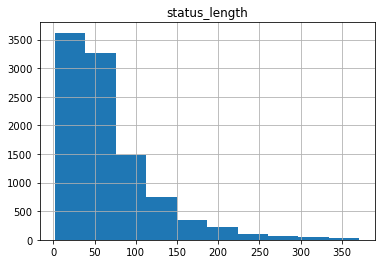

In [8]:
df.hist(column=['status_length'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc2d0df4b50>]],
      dtype=object)

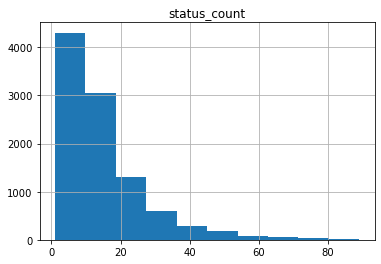

In [9]:
df.hist(column=['status_count'])

---

## EDA of Personality Scores

There are two sets of personality columns in the dataset: class and score. According to the attached paper, scores have been converted to categories based on whether a score for a user fell above or below the median.

### Plot the distributions of personality scores for all five score columns:

In [10]:
cat_cols = [col for col in copy.columns if col.startswith('c')]

In [23]:
subset = copy.dropna(subset=cat_cols)

binarize_dict = {
    'n': 0,
    'y': 1}

subset['cEXT'] = subset['cEXT'].map(binarize_dict)
subset['cNEU'] = subset['cNEU'].map(binarize_dict)
subset['cAGR'] = subset['cAGR'].map(binarize_dict)
subset['cCON'] = subset['cCON'].map(binarize_dict)
subset['cOPN'] = subset['cOPN'].map(binarize_dict)
#subset.head()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc302612fa0>]],
      dtype=object)

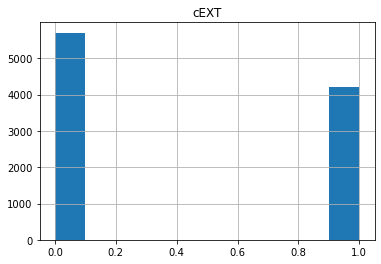

In [24]:
subset.hist('cEXT')

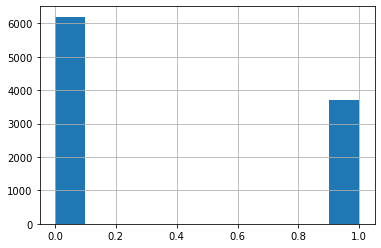

In [25]:
subset['cNEU'].hist()

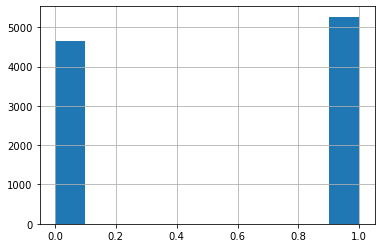

In [26]:
subset['cAGR'].hist()

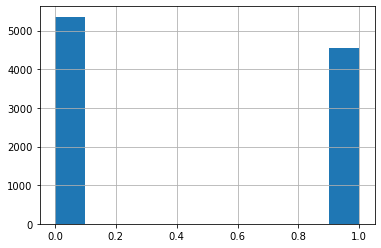

In [27]:
subset['cCON'].hist()

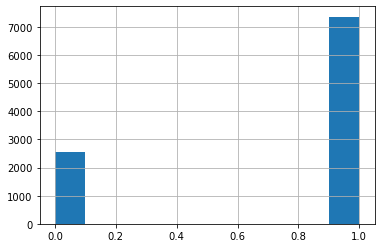

In [28]:
subset['cOPN'].hist()

---

### How many unique users exist in the dataset?

This dataset has redacted original poster names, but each user is given an `#AUTHID`. How many unique users are there, and how many posts per user do we have?

In [ ]:
df['#AUTHID'].nunique()

In [74]:
df.groupby(['#AUTHID']).agg({'#AUTHID':'count','status_length':'mean'})

,#AUTHID,status_length
#AUTHID,,
00419a4c96b32cd63b2c7196da761274,1,13.000000
02c37028a782cfda660c7243e45244bb,6,50.666667
03133a828cd0cf52e3752813ce5d818f,5,108.400000
03e6c4eca4269c183fa0e1780f73faba,8,97.625000
06b055f8e2bca96496514891057913c3,12,97.083333
...,...,...
f83aa7290cf3ae8ed75d6aee5ebbb559,6,19.500000
fbe5aa478508d1dc931427ade5d9e1b4,3,68.000000
fc1c9fb6c64740edcbbf8cfe9dde8b02,30,73.133333


In [29]:
subset.head()

,#AUTHID,STATUS,sEXT,sNEU,sAGR,sCON,sOPN,cEXT,cNEU,cAGR,cCON,cOPN,DATE,status_length,status_count
0,b7b7764cfa1c523e4e93ab2a79a946c4,likes the sound of thunder.,2.65,3.0,3.15,3.25,4.4,0,1,0,0,1,06/19/09 03:21 PM,23,5
1,b7b7764cfa1c523e4e93ab2a79a946c4,is so sleepy it's not even funny that's she can't get to sleep.,2.65,3.0,3.15,3.25,4.4,0,1,0,0,1,07/02/09 08:41 AM,51,13
2,b7b7764cfa1c523e4e93ab2a79a946c4,"is sore and wants the knot of muscles at the base of her neck to stop hurting. On the other hand, YAY I'M IN ILLINOIS! <3",2.65,3.0,3.15,3.25,4.4,0,1,0,0,1,06/15/09 01:15 PM,96,26
3,b7b7764cfa1c523e4e93ab2a79a946c4,likes how the day sounds in this new song.,2.65,3.0,3.15,3.25,4.4,0,1,0,0,1,06/22/09 04:48 AM,34,9
4,b7b7764cfa1c523e4e93ab2a79a946c4,is home. <3,2.65,3.0,3.15,3.25,4.4,0,1,0,0,1,07/20/09 02:31 AM,9,3


## EDA on unique users

Because we have many posts per user for most users, doing EDA on the personality score columns might be misleading. If we have 200 Facebook statuses from one very high-conscientiousness user, a bar chart of how many `'cCON'` statuses are associated with `'y'` might be misleading. We'll have to be careful about labeling and titling any visualizations we make off of the dataset.

#### Create a new dataframe called `unique_users` that only contains the `#AUTHID`, personality score, and personality category columns:

If you do this correctly, it should have 250 rows and 11 columns.

(Hint: You can use the pandas [drop_duplicates()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html) method to make this easier. The only column you want to consider when deciding if a user is duplicated is the `#AUTHID` column.)

In [48]:
unique_users = subset.drop(columns=['STATUS','DATE','status_length',
                                    'status_count']).drop_duplicates(['#AUTHID'])

nonunique_users = copy.drop(columns=['STATUS','DATE','status_length',
                                    'status_count']).drop_duplicates(['#AUTHID'])


unique_users.shape , nonunique_users.shape 


((250, 11), (250, 11))

In [52]:
unique_users.head()

,#AUTHID,sEXT,sNEU,sAGR,sCON,sOPN,cEXT,cNEU,cAGR,cCON,cOPN
0,b7b7764cfa1c523e4e93ab2a79a946c4,2.65,3.00,3.15,3.25,4.40,0,1,0,0,1
102,318bf822d4f2bd3920367560218619c0,4.50,4.00,3.00,4.50,3.75,1,1,0,1,0
171,ecbddbfe00e0f83cfdb802a7186061c7,4.30,2.15,3.60,3.30,4.10,1,0,1,0,1
236,db39f7b2aad360b1033ec1f8fcd57f9c,4.65,3.20,3.05,3.65,4.75,1,1,0,1,1
246,4d035bd3fd8d9595d15cea9e388964be,3.70,2.90,3.40,3.35,4.05,1,1,0,0,1


#### Plot the distribution of personality scores for `unique_users`:

Do the distributions look different? Here, each individual user will only be represented once.

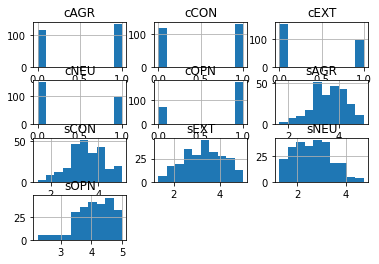

In [49]:
unique_users.hist();

<Figure size 1152x648 with 0 Axes>

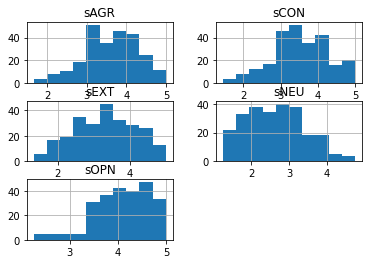

In [51]:
plt.figure(figsize = (16,9))
nonunique_users.hist();

#### Use the `.describe()` method on `unique_users`:

In [33]:
unique_users.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sEXT,250.0,3.29212,0.861368,1.33,2.6625,3.30,4.00,5.00
sNEU,250.0,2.62724,0.776835,1.25,2.0000,2.59,3.15,4.75
sAGR,250.0,3.60032,0.670758,1.65,3.1500,3.66,4.10,5.00
sCON,250.0,3.52292,0.740211,1.45,3.0000,3.50,4.05,5.00
sOPN,250.0,4.07856,0.575060,2.25,3.7500,4.15,4.50,5.00
cEXT,250.0,0.38400,0.487334,0.00,0.0000,0.00,1.00,1.00
cNEU,250.0,0.39600,0.490045,0.00,0.0000,0.00,1.00,1.00
cAGR,250.0,0.53600,0.499703,0.00,0.0000,1.00,1.00,1.00
cCON,250.0,0.52000,0.500602,0.00,0.0000,1.00,1.00,1.00
cOPN,250.0,0.70400,0.457407,0.00,0.0000,1.00,1.00,1.00


### Plots vs. Tables

Consider what different information is easily conveyed by the plots of scores, versus the table with summary statistics. Explain when you might present a distribution versus when you might present a table of summary statistics.

In [40]:
import numpy as np

#### Other visualizations:

Create 1-2 additional visualizations related to the `unique_users` dataframe.

You might consider:
- Barcharts of users per category per trait
- A seaborn correlation heatmap
- A seaborn pairplot

In [41]:
#sns.heatmap(unique_users.corr()[['tripduration']].sort_values('tripduration'),
 #           annot=True,vmin=-1,vmax=1,cmap='mako_r')

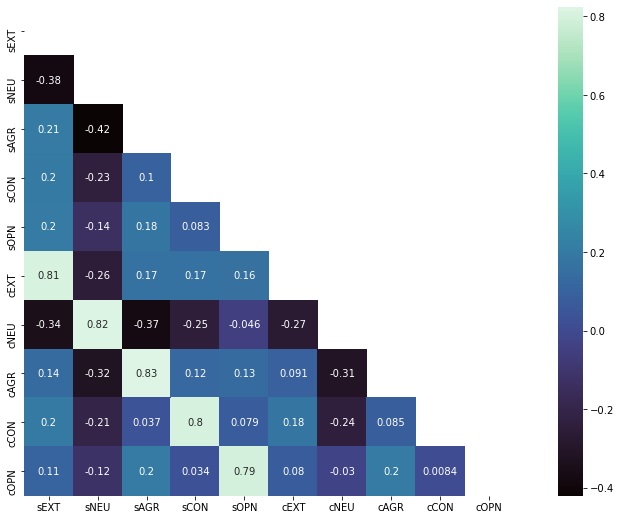

In [42]:
#lesson 2.02
# Establish size of figure.
plt.figure(figsize = (16,9))

# Get correlation of variables.
corr = unique_users.corr()

# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Plot our correlation heatmap, while masking the upper triangle to be white.
sns.heatmap(corr, mask = mask, square = True, cmap = 'mako', annot = True);

---

## Exploring status length and word count based on personality

#### Using `groupby()`, find the mean status length and status word count for posts by users in the high and low categories of each of the Big 5 traits.

You'll need to use `groupby()` five separate times for this.

In [89]:
subset.drop_duplicates(['#AUTHID']).groupby(['cEXT']).agg({'#AUTHID':'count','status_length':'mean',
                              'status_count':'mean'})
 # cEXT	cNEU	cAGR	cCON	cOPN  


,#AUTHID,status_length,status_count
cEXT,,,
0,154,62.344156,13.571429
1,96,60.104167,13.458333


In [90]:
subset.drop_duplicates(['#AUTHID']).groupby(['cNEU']).agg({'#AUTHID':'count','status_length':'mean','status_count':'mean'})

,#AUTHID,status_length,status_count
cNEU,,,
0,151,62.403974,13.549669
1,99,60.080808,13.494949


In [91]:
subset.drop_duplicates(['#AUTHID']).groupby(['cAGR']).agg({'#AUTHID':'count','status_length':'mean','status_count':'mean'})

,#AUTHID,status_length,status_count
cAGR,,,
0,116,63.87069,14.120690
1,134,59.41791,13.014925


In [92]:
subset.drop_duplicates(['#AUTHID']).groupby(['cCON']).agg({'#AUTHID':'count','status_length':'mean','status_count':'mean'})

,#AUTHID,status_length,status_count
cCON,,,
0,120,64.858333,14.500000
1,130,58.369231,12.630769


In [93]:
subset.drop_duplicates(['#AUTHID']).groupby(['cOPN']).agg({'#AUTHID':'count','status_length':'mean','status_count':'mean'})

,#AUTHID,status_length,status_count
cOPN,,,
0,74,60.162162,12.918919
1,176,62.039773,13.784091


#### Choose one of the personality category columns (i.e. `cOPN`, `cCON`, `cEXT`, `cAGR`, or `cNEU`.) Use `sns.distplot()` to visualize the distribution of status word counts for posts by users who score both high (`y`) and low (`n`) in that personality category:

In [97]:
cat_cols = [col for col in subset.columns if col.startswith('c')]
copy[cat_cols].head(3)

,cEXT,cNEU,cAGR,cCON,cOPN
0,n,y,n,n,y
1,n,y,n,n,y
2,n,y,n,n,y


In [99]:
#sns.distplot(df[cat_cols])

---

## EDA on Word Counts

### Vectorize the text

In order to perform EDA on word count data, we'll need to count-vectorize.

Create a dataframe that contains the count-vectorized text for each Facebook status in the dataset.

To do this, you might follow these steps:
- Instantiate a `CountVectorizer` object
- Fit the count vectorizer on the Facebook statuses
- Store the transformed data
- Convert to a dataframe and store
    - Don't forget that the transformed data will need to be 'densified'. The `toarray()` or `todense()` methods will allow this.
    - Don't forget that the `get_feature_names()` method on a fitted `CountVectorizer` object will bring you back the words learned from the dataset, which you can set as the `columns` argument when creating the dataframe.
    
It's up to you whether or not to keep stopwords in the dataset.

In [101]:
unique_usersvec = subset.drop(columns=['status_length',
                                    'status_count']).drop_duplicates(['#AUTHID'])


cv = CountVectorizer()
cv.fit(unique_usersvec['STATUS'])
status_cv = cv.transform(unique_usersvec['STATUS'])
status_df = pd.DataFrame(status_cv.todense(), columns=cv.get_feature_names())

### Show the 15 most common words

In [114]:
sum_words = status_cv.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
words_freq[:15]

[('the', 125),
 ('to', 105),
 ('is', 86),
 ('and', 71),
 ('in', 49),
 ('of', 47),
 ('for', 38),
 ('it', 35),
 ('my', 32),
 ('be', 28),
 ('you', 26),
 ('on', 24),
 ('will', 24),
 ('propname', 24),
 ('that', 23)]

### Show the 15 frequency of the most common words as a bar chart

**Hint**: You can do this in one line of code. [This webpage](https://dfrieds.com/data-visualizations/bar-plot-python-pandas.html) has an example.

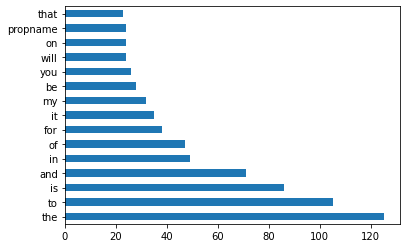

In [104]:
status_df.sum().sort_values(ascending=False).head(15).plot(kind='barh');

### Investigating `propname`

The word `propname` shows up frequently in this dataset. Show the first 10 statuses in the dataset that contain `propname`:

#### Provide a short explanation of what you believe `propname` to be:

Hint: The attached PDF also contains an explanation.

In [ ]:
#prop name seems to point to people who are not famous, they wanted to make the users anon 

## Most common words based on personality category

In order to do more targeted EDA, we'll need to be able to reference not only the dataframe of vectorized statuses, but also the personality scores from the original dataframe.

#### Create a new dataframe called `text_and_scores` that concatenates the count-vectorized statuses side-by-side with the original personality category columns:

In [123]:
text_and_scoress = pd.concat([status_df,unique_users],axis=1)

In [124]:
text_and_scoress.head()

,00,000,01,02,03,07,08,09,0_0,10,...,sEXT,sNEU,sAGR,sCON,sOPN,cEXT,cNEU,cAGR,cCON,cOPN
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.65,3.0,3.15,3.25,4.4,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Show the 25 most common words for statuses from high-cAGR users:

#### Show the 25 most common words for statuses from low-cAGR users:

### (BONUS) Most common bigrams:

This is a bonus section and not required.

Find the 10 most common bigrams in the dataset.

### (BONUS) Most common trigrams:

This is a bonus section and not required.

Find the 10 most common trigrams in the dataset.

---

## Choose your own adventure

By now you've looked at a lot of visualizations and frequency counts.

Come up with 2-3 questions about the data, and try to answer them using descriptive statistics (like counts, averages, etc.) or visualizations.

Some questions you might explore:
- Have numbers been redacted, or are phone numbers, house numbers, or zip codes anywhere in the dataset?
- `PROPNAME` has been used to redact personal names. Given that this data was scraped between 2009 and 2011, investigate if any public figures or famous people show up in the dataset, or their names have been redacted as well.
- Is count of uppercase letters vs. lowercase letters per status related to any personality category or personality score?
- Is _average_ word count per status related to any personality category or personality metric?
- Is punctuation use related to personality?

Or, of course, come up with your own questions to investigate!

The focus here is on "explore" -- you might not find anything of particular interest, but don't let that discourage you.

---

## Exploratory vs. Explanatory Data Analysis 

> **Exploratory analysis** is what you do to get familiar with the data. You may start out with a hypothesis or question, or you may just really be delving into the data to determine what might be interesting about it. Exploratory analysis is the process of turning over 100 rocks to find perhaps 1 or 2 precious gemstones.
>
> **Explanatory analysis** is what happens when you have something specific you want to show an audience - probably about those 1 or 2 precious gemstones. In my blogging and writing, I tend to focus mostly on this latter piece, explanatory analysis, when you've already gone through the exploratory analysis and from this have determined something specific you want to communicate to a given audience: in other words, when you want to tell a story with data.

- Cole Nussbaumer Knaflic, [exploratory vs. explanatory analysis](http://www.storytellingwithdata.com/blog/2014/04/exploratory-vs-explanatory-analysis)

### Choose one visual to explain:

Now that you've performed an exploratory data analysis, choose a visual (or 1-3 related visuals) to frame as _explanatory_. This can be a visual you created above, or you can create a new visual. For this visual, make sure the visuals are formatted clearly, and provide a one to two paragraph explanation/interpretation of the visual.